In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import BatchNormalization

In [26]:
train_data = pd.read_csv('ssss32.csv', encoding='cp949')
test_data = pd.read_csv('ssss42.csv', encoding='cp949')

In [27]:
line_num2=[]
line_num2.append(train_data.index[train_data['노선명'] == '7호선'].tolist())
    
train_data = train_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(train_data.index[train_data['역명'] == '공릉'].tolist())

train_data = train_data.loc[line_num2[0]]
train_data = train_data.reset_index(drop=True)
train_data = train_data.reset_index()
train_data['index'] = train_data['index']

In [28]:
line_num2=[]
line_num2.append(test_data.index[test_data['노선명'] == '7호선'].tolist())
    
test_data = test_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(test_data.index[test_data['역명'] == '공릉'].tolist())

test_data = test_data.loc[line_num2[0]]
test_data = test_data.reset_index(drop=True)
test_data = test_data.reset_index()

In [29]:
train_data['index'] = (train_data['index'] / (len(train_data['index'])-1))
test_data['index'] = (test_data['index'] / (len(test_data['index'])-1))

In [30]:
txlist = []
for i in range(712):
    txlist.append((train_data['index'][i],train_data['승차유임승객수'][i]))
txlist = np.asarray(txlist)

[0.12824481 0.13804685 0.09796945 0.07008816 0.12925258 0.13095936
 0.13269681 0.13303897 0.13705637 0.09621657 0.07231236 0.12697379
 0.13002253 0.12909003 0.12862535 0.13126082 0.09713317 0.06271579
 0.1178144  0.12877206 0.12907052 0.1302692  0.1353773  0.10626211
 0.07246661 0.12820016 0.1075441  0.13053988 0.13291468 0.14547455
 0.09198549 0.06373557 0.07548506 0.13169529 0.1348475  0.13547405
 0.14341641 0.09580449 0.0723818  0.12926915 0.13746974 0.13034449
 0.13179326 0.14699393 0.11036661 0.07446471 0.12618908 0.07835463
 0.12880019 0.1345109  0.1432667  0.10507204 0.07274453 0.12630083
 0.13233901 0.13135189 0.13343438 0.13464167 0.09556691 0.06490854
 0.11938215 0.13548085 0.07253112 0.11955118 0.13361764 0.09790534
 0.06284887 0.11543569 0.13049573 0.0774475  0.11815587 0.12644918
 0.09381882 0.06194108 0.11620231 0.12286627 0.12348218 0.12400459
 0.12924946 0.10249276 0.06527388 0.11043813 0.10585406 0.11435308
 0.11246624 0.1214     0.08690569 0.05072804 0.10425663 0.1150

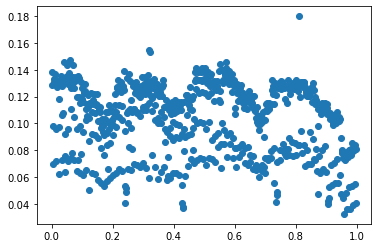

In [31]:
from scipy.interpolate import splrep, splev 

spl = splrep(txlist[:,0], txlist[:,1]) 
fs = 712 # max 500Hz *2 
dt = 1/fs # 0.001 
newt = np.arange(0, 1, dt) 
newx = splev(newt, spl) 
print(newx) 
if True: 
    plt.figure() 
    plt.scatter(newt, newx)
    plt.show()

nfft =  712


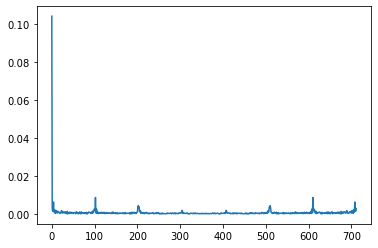

In [32]:
import math
nfft = len(newt) # number of sample count. 
print('nfft = ', nfft) 
df = fs/nfft # 주파수 증가량 = max freq / 샘플개수 
k = np.arange(nfft) 
f = k*df # 0부터~최대주파수까지의 범위 (sample count 개수 만큼, df증가량으로 분포) 

# 주파수 스펙트럼은 중앙을 기준으로 대칭이 된다. 반만 구한다. 
nfft_half = math.trunc(nfft/2) 
f0 = f[range(nfft)] # only half size check for get hz. 
y = np.fft.fft(newx)/nfft # 증폭을 두 배로 한다. (반만 계산해서 에너지가 반으로 줌) 
y0 = y[range(nfft)] # one side. 
amp = abs(y0) # 벡터(복소수) norm 측정. 신호 강도. 
if True: 
    plt.figure() 
    plt.plot(f0, amp)
    plt.show()

In [33]:
ampsort = np.sort(amp) 
q1, q3 = np.percentile(ampsort, [25, 75]) 
iqr = q3-q1 
upper_bound = q3+1.5*iqr 
print('q1=',q1, 'q3=',q3, 'upper_bound=', upper_bound) 
outer = ampsort[ampsort>upper_bound]
print('outer cnt=', len(outer)) 
topn = len(outer)
print(outer)

q1= 0.0002443895934060897 q3= 0.0006574155113108857 upper_bound= 0.0012769543881680798
outer cnt= 55
[0.00131942 0.00131942 0.00132364 0.00132364 0.0013686  0.0013686
 0.00138285 0.00138285 0.00142048 0.00142048 0.00143005 0.00143005
 0.00152835 0.00152835 0.00164225 0.00164225 0.00170435 0.00170435
 0.00173114 0.00173114 0.00177842 0.00177842 0.00178802 0.00178802
 0.00180648 0.00180648 0.00185586 0.00185586 0.00200369 0.00200369
 0.00217959 0.00217959 0.00227187 0.00227187 0.00232841 0.00232841
 0.00249707 0.00249707 0.00262056 0.00262056 0.00287885 0.00287885
 0.0034232  0.0034232  0.00350579 0.00350579 0.00364927 0.00364927
 0.00438491 0.00438491 0.00630344 0.00630344 0.00868464 0.00868464
 0.10427502]


In [39]:
ampsort

array([1.96161754e-05, 1.96161754e-05, 2.68365421e-05, 2.68365421e-05,
       3.23338539e-05, 3.23338539e-05, 3.33014857e-05, 3.33014857e-05,
       3.36465040e-05, 3.36465040e-05, 3.74921817e-05, 3.74921817e-05,
       4.41232287e-05, 4.41232287e-05, 4.94209043e-05, 4.94209043e-05,
       5.29379658e-05, 5.29379658e-05, 5.59182882e-05, 5.59182882e-05,
       6.57737489e-05, 6.57737489e-05, 6.59966373e-05, 6.59966373e-05,
       8.19985081e-05, 8.19985081e-05, 9.03477721e-05, 9.03477721e-05,
       9.57029086e-05, 9.57029086e-05, 9.58238246e-05, 9.58238246e-05,
       9.63705572e-05, 9.63705572e-05, 9.65028654e-05, 9.65028654e-05,
       9.78322451e-05, 9.78322451e-05, 9.90755767e-05, 9.90755767e-05,
       1.00730981e-04, 1.00730981e-04, 1.03824910e-04, 1.04024318e-04,
       1.04024318e-04, 1.05881009e-04, 1.05881009e-04, 1.08641115e-04,
       1.08641115e-04, 1.13878269e-04, 1.13878269e-04, 1.14707986e-04,
       1.14707986e-04, 1.16869768e-04, 1.16869768e-04, 1.25146581e-04,
      

In [37]:
topn = 712

freq= 0.0 coec= 0.10427501735753263  coes -0.0
freq= 610.0 coec= 0.008289657094633567  coes -0.0025893245243724062
freq= 102.0 coec= 0.008289657094633569  coes 0.0025893245243724067
freq= 708.0 coec= 0.000730195846209399  coes -0.006261008009953995
freq= 4.0 coec= 0.0007301958462093992  coes 0.006261008009953995
freq= 510.0 coec= 0.0038855402541581588  coes 0.002032237901567202
freq= 202.0 coec= 0.0038855402541581588  coes -0.002032237901567201
freq= 204.0 coec= -0.0035016491336559426  coes -0.0010274335074812145
freq= 508.0 coec= -0.0035016491336559426  coes 0.0010274335074812143
freq= 511.0 coec= 0.002584623083790121  coes -0.0023686004700339816
freq= 201.0 coec= 0.002584623083790121  coes 0.0023686004700339816
freq= 203.0 coec= 0.0014116542554058562  coes 0.0031185812515311753
freq= 509.0 coec= 0.001411654255405856  coes -0.003118581251531174
freq= 1.0 coec= -0.0028620135840048515  coes 0.00031089012642766437
freq= 711.0 coec= -0.002862013584004851  coes -0.000310890126427664
freq= 

freq= 170.0 coec= 0.00024613152954182247  coes -6.634664410841946e-05
freq= 542.0 coec= 0.00024613152954182225  coes 6.63466441084197e-05
freq= 379.0 coec= -0.000115118708465006  coes -0.0002242801701990195
freq= 333.0 coec= -0.00011511870846500597  coes 0.0002242801701990194
freq= 151.0 coec= -0.0001697734090010825  coes 0.00018329644390154755
freq= 561.0 coec= -0.00016977340900108264  coes -0.00018329644390154738
freq= 165.0 coec= 0.00021476299851694324  coes -0.00012373425404530803
freq= 547.0 coec= 0.0002147629985169432  coes 0.00012373425404530816
freq= 161.0 coec= 0.00019199421337504159  coes 0.00015368885914171496
freq= 551.0 coec= 0.00019199421337504153  coes -0.00015368885914171474
freq= 567.0 coec= 0.0001278823552366565  coes 0.00020924534015785237
freq= 145.0 coec= 0.00012788235523665653  coes -0.00020924534015785237
freq= 589.0 coec= 1.7771385843010157e-05  coes -0.0002443912568990085
freq= 123.0 coec= 1.777138584301008e-05  coes 0.00024439125689900825
freq= 291.0 coec= -0.

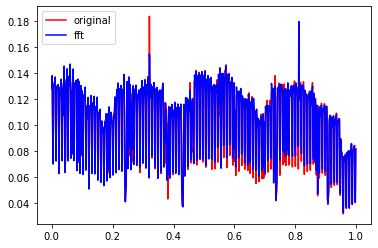

In [38]:
idxy = np.argsort(-amp)
newy = np.zeros((nfft,))
arfreq = []
arcoec = []
arcoes = []

for i in range(topn): 
    freq = f0[idxy[i]] 
    yx = y[idxy[i]] 
    coec = yx.real
    coes = yx.imag * -1
    print('freq=', freq, 'coec=', coec, ' coes', coes)
    newy += coec * np.cos(2 * np.pi * freq * newt) + coes * np.sin(2 * np.pi * freq * newt)
    arfreq.append(freq)
    arcoec.append(coec)
    arcoes.append(coes)
    
plt.figure() 
plt.plot(txlist[:,0], txlist[:,1], c='r', label='original') 
plt.plot(newt, newy, c='b', label='fft') 
plt.legend()
plt.show()

In [211]:
test_data['index'] = test_data['index'] / (len(test_data['index'])-1)

In [213]:
txlist2 = []
for i in range(365):
    txlist2.append((test_data['index'][i],test_data['승차유임승객수'][i]))
txlist2 = np.asarray(txlist2)

[0.07962294 0.07588526 0.07730682 0.08122709 0.08498555 0.08592167
 0.0814871  0.07164841 0.05885122 0.04586528 0.03731543 0.03876027
 0.05296839 0.07188278 0.08488062 0.08694116 0.08352187 0.0810247
 0.08147893 0.08272524 0.08275639 0.082182   0.08288957 0.08577611
 0.08799709 0.08585376 0.0777041  0.06563961 0.05221905 0.04147456
 0.03880981 0.0485658  0.06629985 0.08340894 0.09277318 0.09273738
 0.08292672 0.06670739 0.05403652 0.05497485 0.06862094 0.08415807
 0.09165998 0.09068667 0.08515566 0.0780581  0.06905597 0.05712046
 0.04428376 0.03781304 0.04495899 0.06321631 0.08150522 0.08994437
 0.0895898  0.08636934 0.08484183 0.08484404 0.08522239 0.08558708
 0.08681646 0.08977481 0.09297654 0.09292933 0.08666048 0.07533584
 0.06190875 0.04979416 0.04389995 0.0493554  0.0656249  0.08304113
 0.09167364 0.09108078 0.08869443 0.09079901 0.09419644 0.09171969
 0.07954985 0.06455751 0.05564354 0.05617907 0.06087984 0.06391125
 0.0627167  0.05738236 0.04877269 0.04239946 0.04565787 0.06124

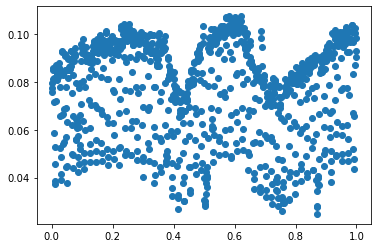

In [214]:
spl2 = splrep(txlist2[:,0], txlist2[:,1]) 
fs2 = 1000 # max 500Hz *2 
dt2 = 1/fs # 0.001 
newt2 = np.arange(0, 1, dt2) 
newx2 = splev(newt2, spl2) 
print(newx2) 
if True: 
    plt.figure() 
    plt.scatter(newt2, newx2)
    plt.show()

nfft =  1000


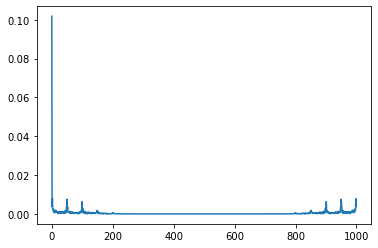

In [215]:
nfft2 = len(newt2) # number of sample count. 
print('nfft = ', nfft2) 
df2 = fs2/nfft2 # 주파수 증가량 = max freq / 샘플개수 
k2 = np.arange(nfft2) 
f2 = k2*df2 # 0부터~최대주파수까지의 범위 (sample count 개수 만큼, df증가량으로 분포) 

# 주파수 스펙트럼은 중앙을 기준으로 대칭이 된다. 반만 구한다. 

f02 = f[range(nfft2)] # only half size check for get hz. 
y2 = np.fft.fft(newx2)/nfft2 # 증폭을 두 배로 한다. (반만 계산해서 에너지가 반으로 줌) 
y02 = y[range(nfft2)] # one side. 
amp2 = abs(y02) # 벡터(복소수) norm 측정. 신호 강도. 
if True: 
    plt.figure() 
    plt.plot(f02, amp2)
    plt.show()

freq= 0.0 coec= 0.10184555134359566  coes -0.0
freq= 2.0 coec= -0.0006671268119875337  coes 0.0078062276449662234
freq= 998.0 coec= -0.0006671268119875335  coes -0.007806227644966224
freq= 950.0 coec= 0.0034122475936235993  coes -0.006803302036794157
freq= 50.0 coec= 0.0034122475936235993  coes 0.006803302036794157
freq= 901.0 coec= 0.005548348736419645  coes -0.0029831576316415296
freq= 99.0 coec= 0.005548348736419645  coes 0.00298315763164153
freq= 951.0 coec= -0.0035050470317398723  coes -0.0034877876723976037
freq= 49.0 coec= -0.0035050470317398723  coes 0.0034877876723976033
freq= 999.0 coec= -0.0028594538295444085  coes -0.002542068659132049
freq= 1.0 coec= -0.0028594538295444076  coes 0.0025420686591320486
freq= 52.0 coec= -0.0006126546070540397  coes -0.003525868082220098
freq= 948.0 coec= -0.0006126546070540397  coes 0.0035258680822200976
freq= 48.0 coec= 0.0022692831955492955  coes 0.001501219730793889
freq= 952.0 coec= 0.0022692831955492955  coes -0.0015012197307938892
freq=

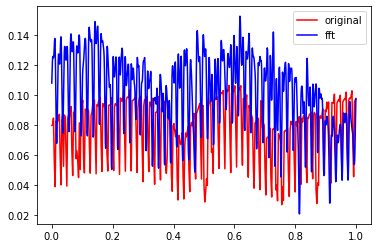

In [218]:
newy2 = np.zeros((nfft2,))

for i in range(93): 
    freq = arfreq[i]
    coec = arcoec[i]
    coes = arcoes[i]
    print('freq=', freq, 'coec=', coec, ' coes', coes)
    newy2 += coec * np.cos(2 * np.pi * freq * newt) + coes * np.sin(2 * np.pi * freq * newt)
    
plt.figure() 
plt.plot(txlist2[:,0], txlist2[:,1], c='r', label='original') 
plt.plot(newt2, newy2, c='b', label='fft') 
plt.legend()
plt.show()

In [13]:
X_train = train_data.drop(['index', '사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_train = train_data[['승차유임승객수']]

X_test = test_data.drop(['index', '사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_test = test_data[['승차유임승객수']]

In [14]:
X = tf.keras.layers.Input(shape=[13]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(30, activation='swish')(X)
#H1 = tf.keras.layers.BatchNormalization()(H)
H1 = tf.keras.layers.Dense(30, activation='swish')(H)
H2 = tf.keras.layers.Dense(30, activation='swish')(H1)
y = tf.keras.layers.Dense(1)(H2)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [15]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 600us/step - loss: 0.0011
Epoch 2/100
23/23 [==============================] - 0s 500us/step - loss: 7.7162e-04
Epoch 3/100
23/23 [==============================] - 0s 500us/step - loss: 7.9194e-04
Epoch 4/100
23/23 [==============================] - 0s 455us/step - loss: 8.1070e-04
Epoch 5/100
23/23 [==============================] - 0s 455us/step - loss: 7.6064e-04
Epoch 6/100
23/23 [==============================] - 0s 455us/step - loss: 7.7732e-04
Epoch 7/100
23/23 [==============================] - 0s 455us/step - loss: 7.5797e-04
Epoch 8/100
23/23 [==============================] - 0s 500us/step - loss: 7.6479e-04
Epoch 9/100
23/23 [==============================] - 0s 500us/step - loss: 7.7504e-04
Epoch 10/100
23/23 [==============================] - 0s 455us/step - loss: 7.2960e-04
Epoch 11/100
23/23 [==============================] - 0s 455us/step - loss: 7.5548e-04
Epoch 12/100
23/23 [==============================] - 0s

In [16]:
model.predict(X_test)

array([[0.08875212],
       [0.08914497],
       [0.09253161],
       [0.08285136],
       [0.07116249],
       [0.09145829],
       [0.09410912],
       [0.09217897],
       [0.09191857],
       [0.09422968],
       [0.08134659],
       [0.0733426 ],
       [0.09059893],
       [0.09256884],
       [0.07511467],
       [0.09143439],
       [0.08853447],
       [0.08188654],
       [0.06788751],
       [0.08798613],
       [0.08575839],
       [0.08539039],
       [0.09007899],
       [0.09026769],
       [0.07861073],
       [0.07432599],
       [0.09542194],
       [0.10012417],
       [0.10032946],
       [0.09356049],
       [0.09966999],
       [0.10092652],
       [0.09346215],
       [0.09905498],
       [0.08627491],
       [0.09945549],
       [0.10065843],
       [0.09974076],
       [0.08487576],
       [0.08046137],
       [0.09515753],
       [0.09497897],
       [0.09719014],
       [0.09989104],
       [0.09544984],
       [0.08608152],
       [0.08418655],
       [0.097

In [17]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(712, 13)
(712, 1)
(365, 13)
(365, 1)
